In [1]:
# Random Quantum Density Operators
# Final Project: MIT 18.338 Eigenvalues of Random Matrices
# Maison Clouatre & Bunyamin Kartal

# This code generates random densities from a dA-system coupled to a dB-reservoir
using LinearAlgebra, Plots, LaTeXStrings

function ppTrace(ψ,dA,dB)
    # Partial trace of pure state: "pure partial trace"
    # Takes in a pures state |ψ> and the dimensions of the subsystems.
    # Outputs the partial trace over its second subsystem.
    X = reshape(ψ,dB,dA);

    # Note the order of the conjugate-transpose here.  That's because 
    # Julia's reorder function is column major, but we need row major.
    # Apparently this is a known "hurdle", but is endured because
    # reshape keeps a view of the original memory... and is fast.
    # See: https://github.com/JuliaLang/julia/issues/20311
    return conj(X'*X);
end

function randU(n)
    # Generates random unitary matrix using 
    # QR factorization of matrix of complex normals
    X = randn(n,n) + 1im*randn(n,n);
    Q, R = qr(X);
    D = diag(R)./diag(R);
    return Q*diagm(D);
end

randU (generic function with 1 method)

In [14]:
# Demo partial trace
ψ = [1;2;3;4]
ppTrace(ψ,2,2)

ψ = [1;2;3;4;5;6]
ppTrace(ψ,2,3)

2×2 Matrix{Int64}:
 14  32
 32  77

In [15]:
# Demo random unitary
U = randU(3)
U'*U

3×3 Matrix{ComplexF64}:
         1.0+0.0im          …  2.77556e-17+4.16334e-17im
         0.0+0.0im             2.22045e-16-1.66533e-16im
 2.77556e-17-4.16334e-17im             1.0+0.0im

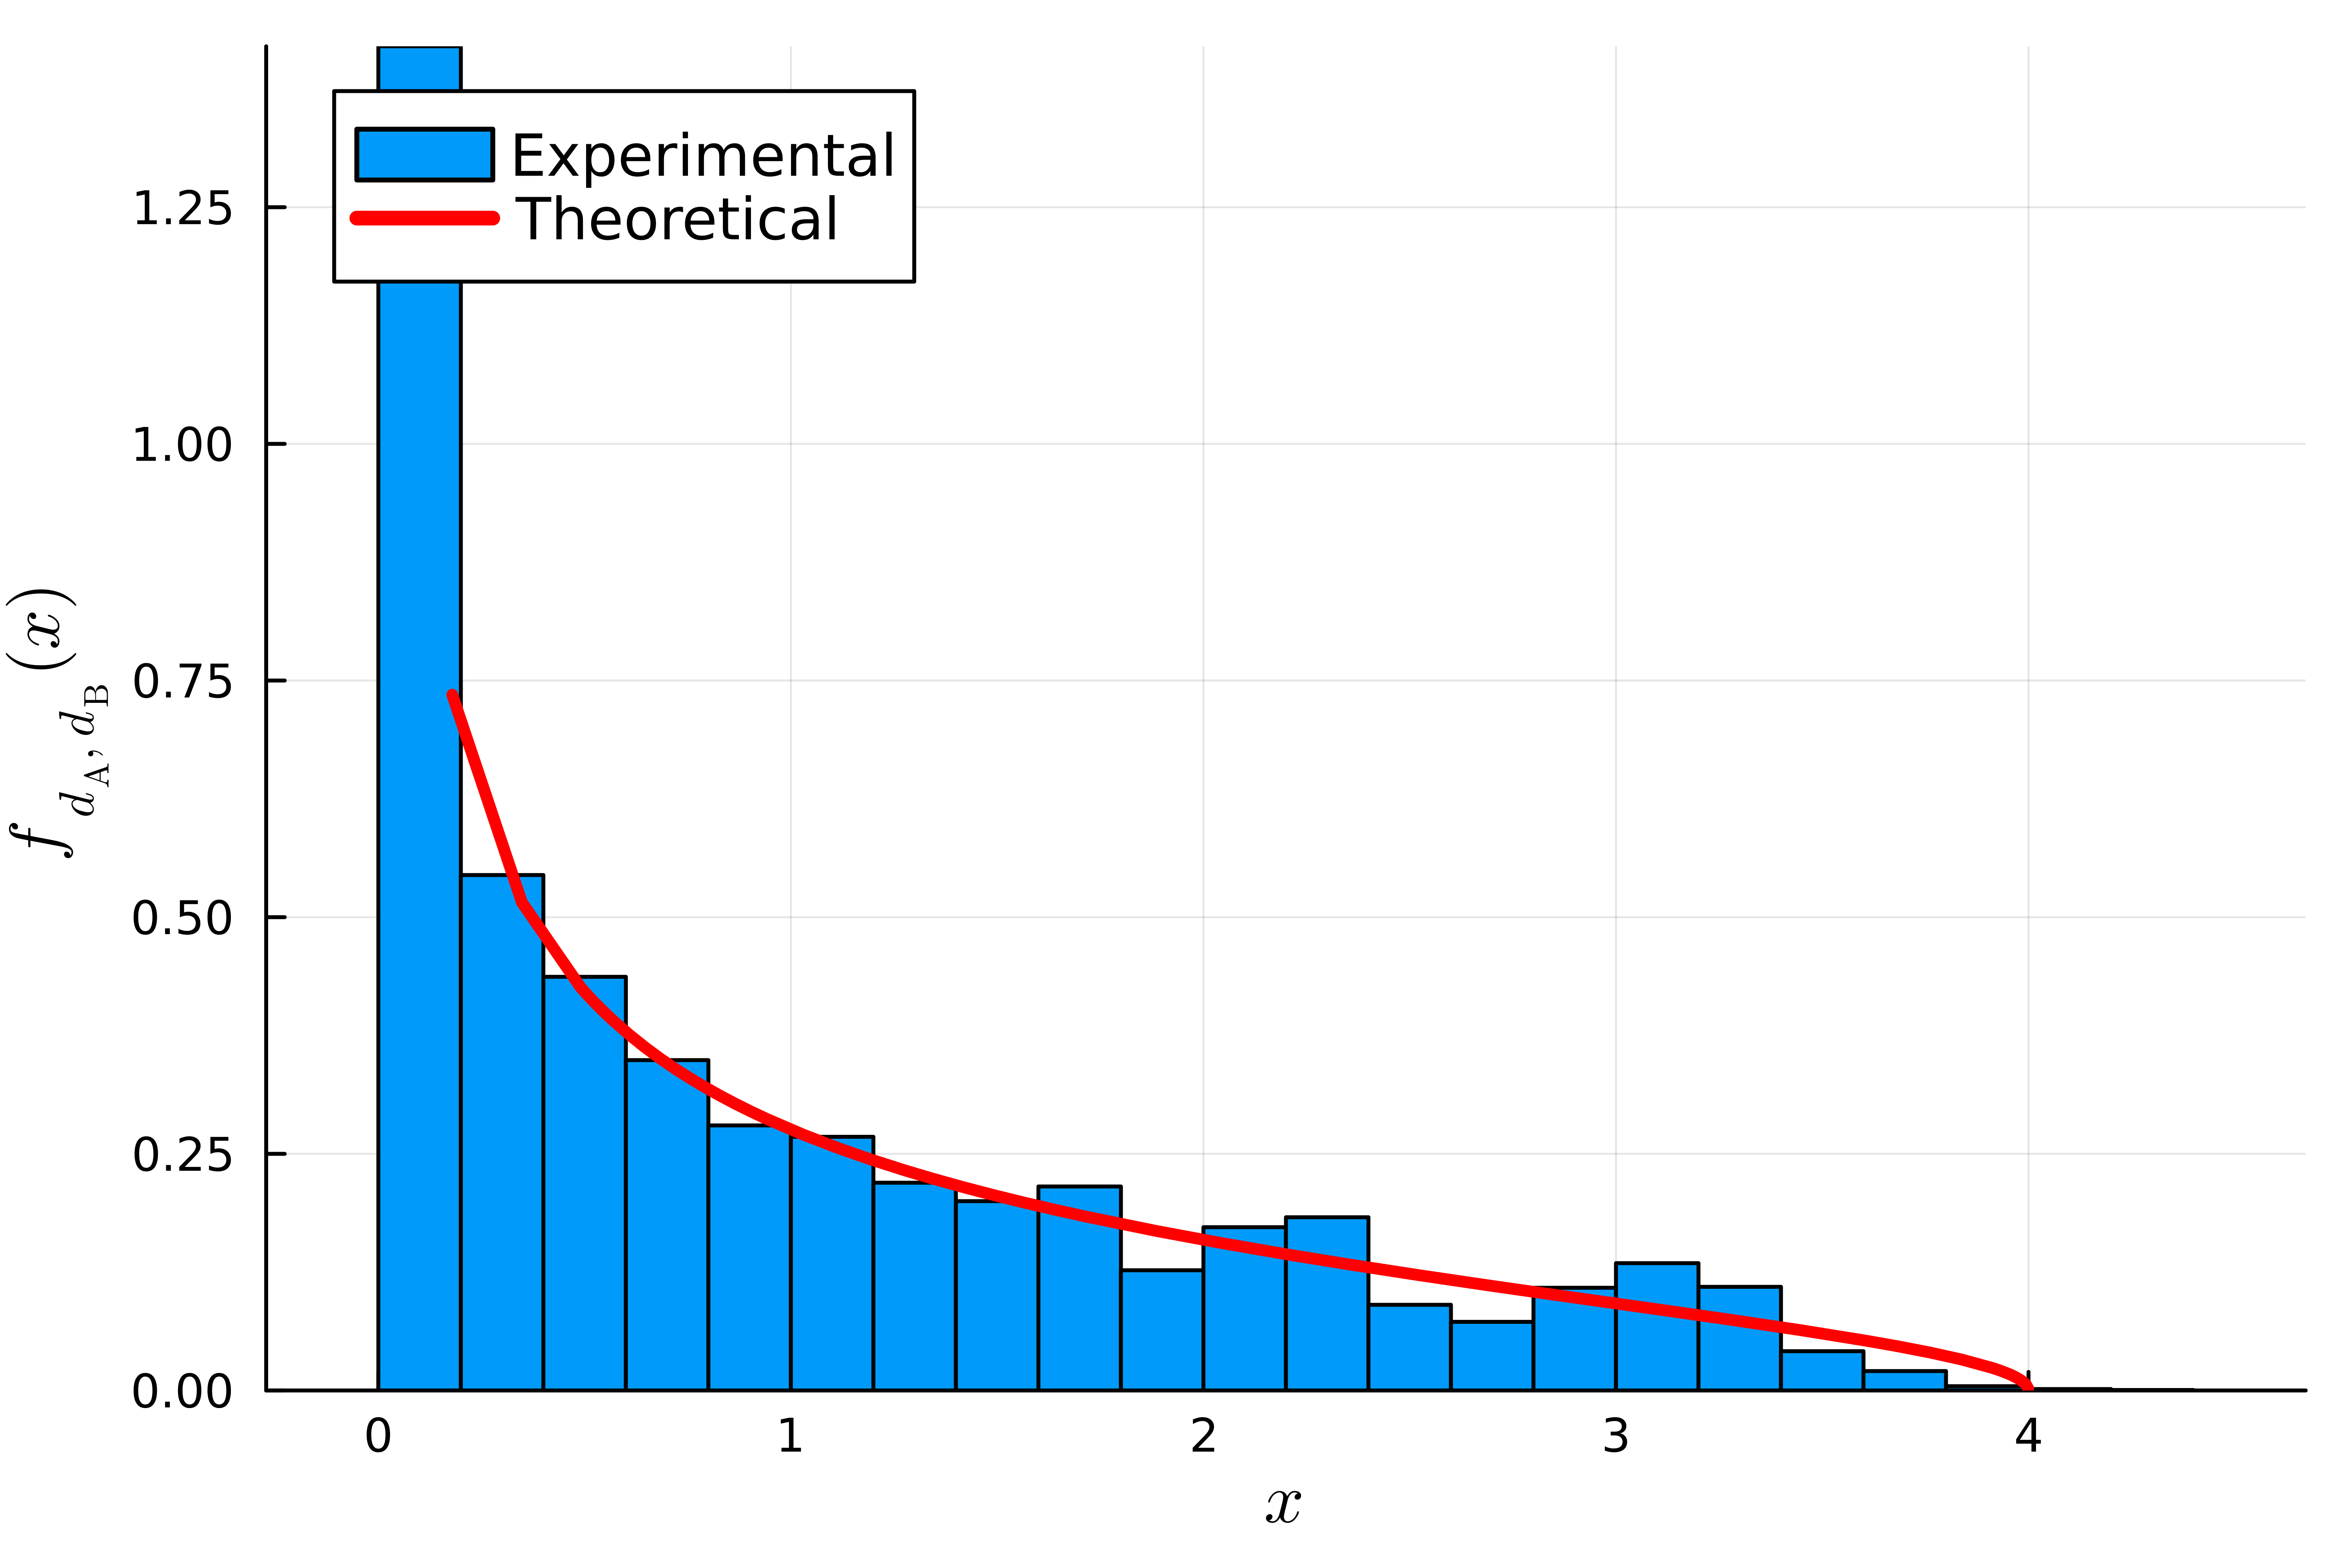

In [41]:
# Marchenko-Pastur demo (generating full unitary matrix)
dA = 10;
dB = 10;
numSamples = 1000;

data = zeros(numSamples,dA);

for i=1:numSamples
    # Generate a random unitary from U(dA⋅dB)
    # according to Haar measure
    U = randU(dA*dB);

    # Take first column and compute partial trace
    Ξ = ppTrace(U[:,1], dA, dB);

    # Compute eigvals
    data[i,:] = dB*eigvals(Ξ);
end

# Analytical
c = dB/dA
aplus = 1 + c + 2√(c)
aminus = 1 + c - 2√(c)
f(x) = √((x-aminus)*(aplus-x))/(2*π*x)

histogram(data[:], normalize=:pdf, label="Experimental")
plot!(f, label="Theoretical", lw=3, color=:red, legendfontsize=10, dpi=1000)
xlabel!(L"x", labelfontsize=12)
ylabel!(L"f_{d_{\mathrm{A}},d_{\mathrm{B}}}(x)", labelfontsize=12)
#xlims!(0, 10)

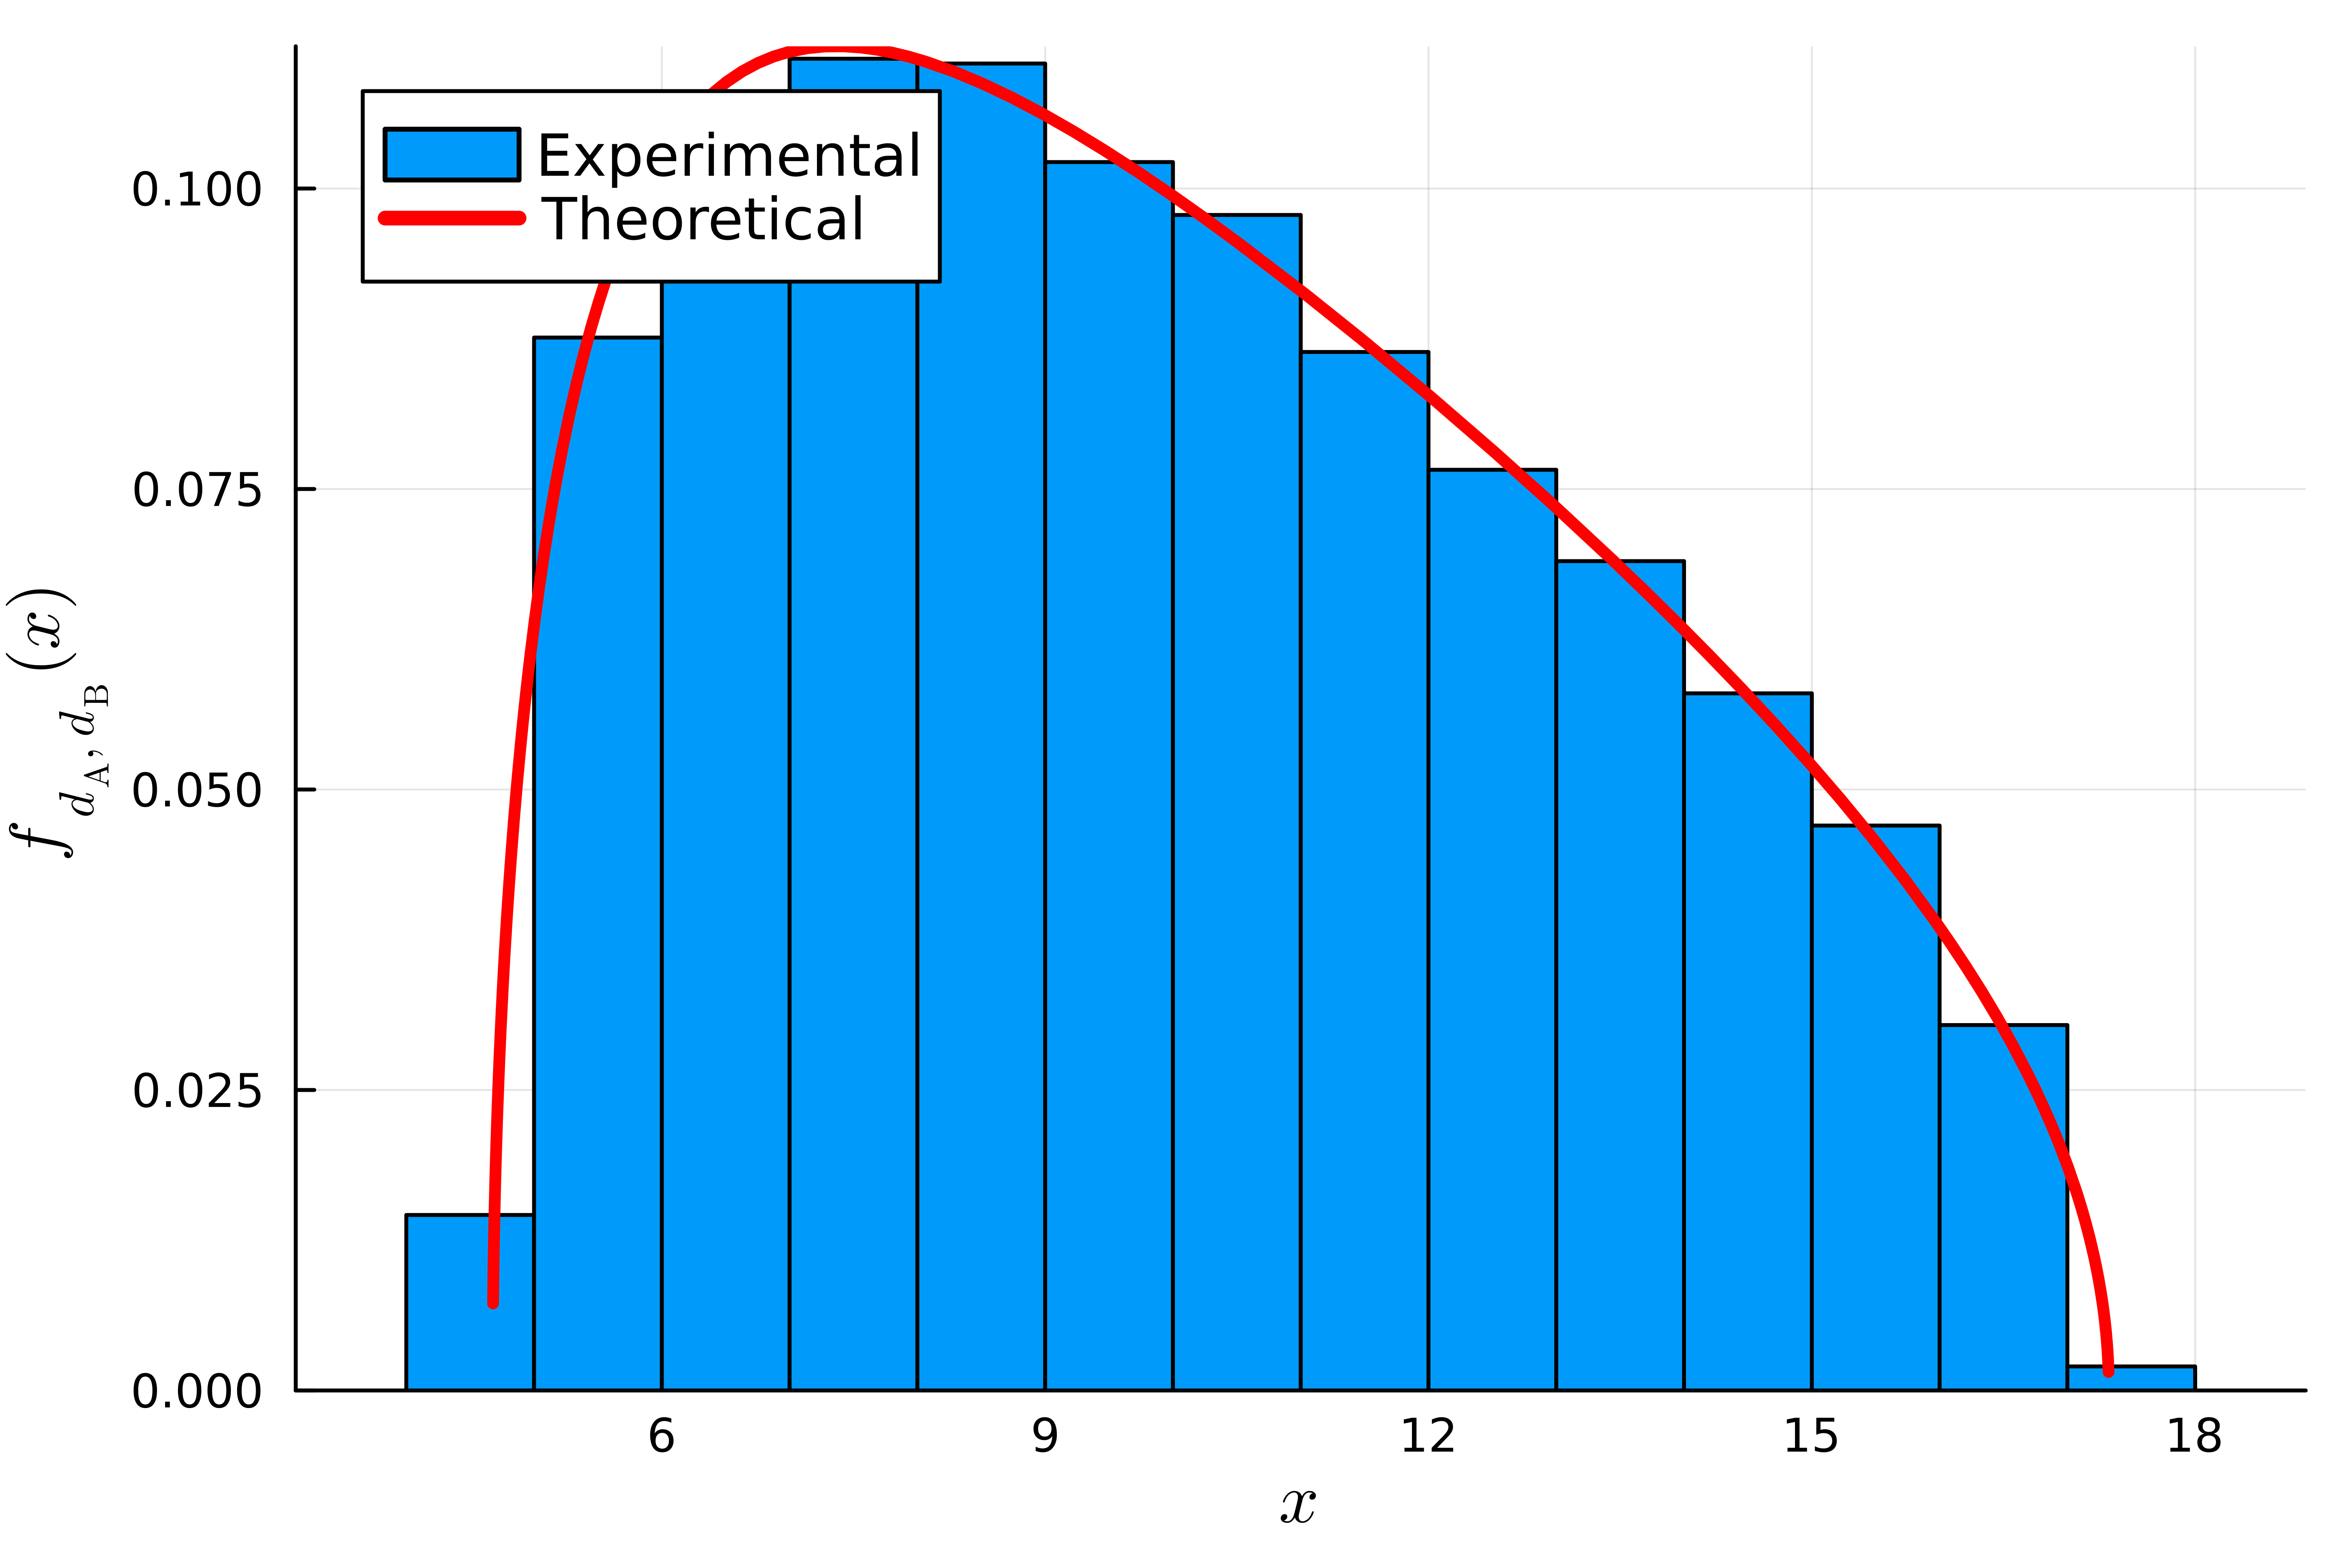

In [26]:
# Marchenko-Pastur demo (WITHOUT generating full unitary matrix)
dA = 50;
dB = 500;
numSamples = 100;

data = zeros(numSamples,dA);
d = dA*dB;

for i=1:numSamples
    # Just create a random normal length vector
    u = randn(d) + 1im*randn(d);
    u = u/norm(u);

    # Compute partial trace
    Ξ = ppTrace(u, dA, dB);

    # Compute eigvals
    data[i,:] = dB*eigvals(Ξ);
end

# Analytical
c = dB/dA
aplus = 1 + c + 2√(c)
aminus = 1 + c - 2√(c)
f(x) = √((x-aminus)*(aplus-x))/(2*π*x)

histogram(data[:], normalize=:pdf, label="Experimental")
plot!(f, label="Theoretical", lw=3, color=:red, legendfontsize=10, dpi=1000)
xlabel!(L"x", labelfontsize=12)
ylabel!(L"f_{d_{\mathrm{A}},d_{\mathrm{B}}}(x)", labelfontsize=12)
#xlims!(0, 10)

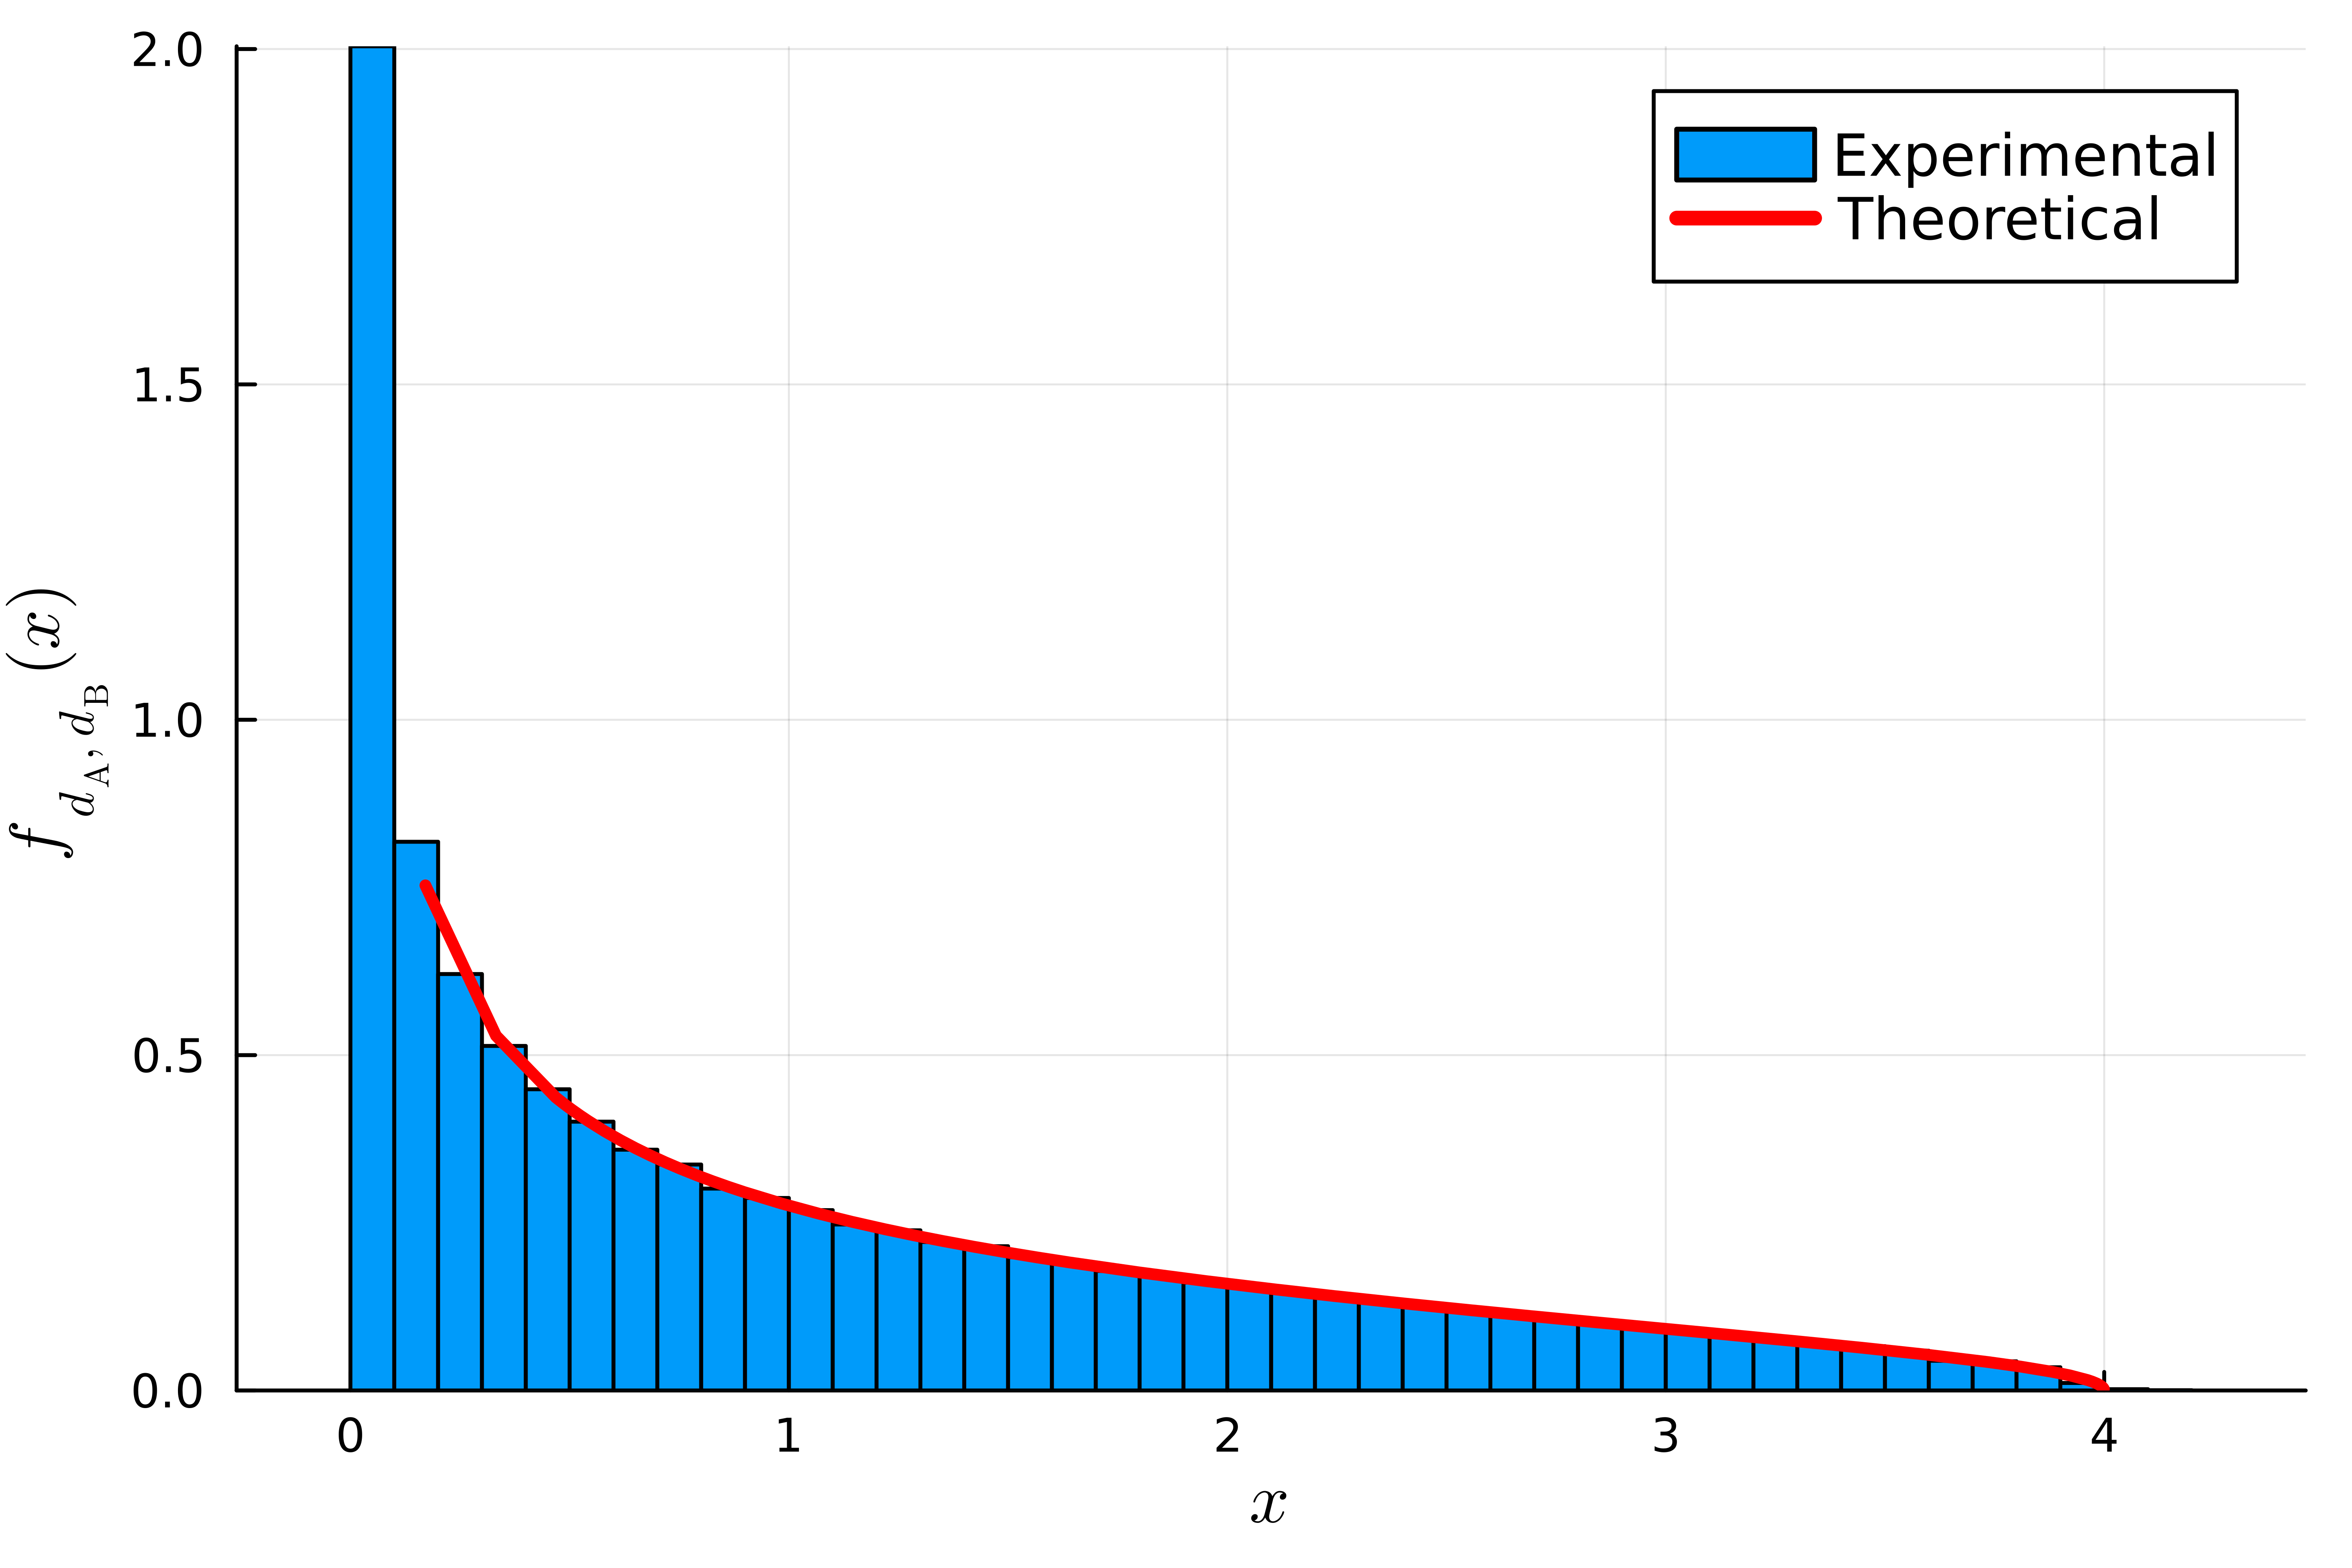

In [2]:
# Marchenko-Pastur demo (quickest way using SVD)
dA = 100;
dB = 100;
numSamples = 1000;

data = zeros(numSamples,dA);
d = dA*dB;

for i=1:numSamples
    # Just create a random normal length vector
    u = randn(d) + 1im*randn(d);
    u = u/norm(u);

    # Partial trace of pure state: Explanation given is function
    # at top of source code.
    X = reshape(u,dB,dA);

    # Compute singular values
    data[i,:] = dB*svdvals(X).^2;
end

# Analytical
c = dB/dA
aplus = 1 + c + 2√(c)
aminus = 1 + c - 2√(c)
f(x) = √((x-aminus)*(aplus-x))/(2*π*x)

histogram(data[:], normalize=:pdf, label="Experimental")
plot!(f, label="Theoretical", lw=3, color=:red, legendfontsize=10, dpi=1000, legend=:topright)
xlabel!(L"x", labelfontsize=12)
ylabel!(L"f_{d_{\mathrm{A}},d_{\mathrm{B}}}(x)", labelfontsize=12)

#savefig("dA10dB10numSamples10000.pdf")
#savefig("dA100dB100numSamples100.pdf")

#savefig("dA10dB20numSamples10000.pdf")
#savefig("dA100dB200numSamples100.pdf")
#xlims!(0, 10)